In [13]:
# Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import Tk, filedialog

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter


Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


C:\Users\USER\AppData\Local\Temp\ipykernel_26096\4263685030.py:35: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=image_size + (3,), include_top=False, weights='imagenet')


Epoch 1/25


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2384 - loss: 1.9205 - val_accuracy: 0.2917 - val_loss: 1.6209
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3222 - loss: 1.5933 - val_accuracy: 0.3500 - val_loss: 1.5027
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4347 - loss: 1.4297 - val_accuracy: 0.5000 - val_loss: 1.3254
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5009 - loss: 1.2926 - val_accuracy: 0.5750 - val_loss: 1.2201
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6209 - loss: 1.0333 - val_accuracy: 0.6833 - val_loss: 1.0838
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7079 - loss: 0.9494 - val_accuracy: 0.7500 - val_loss: 0.9726
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7935 - loss: 0.8037 - val_accuracy: 0.8250 - val_loss: 0.8719
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7579 - loss: 0.7568 - val_accuracy: 0.7583 - val_loss: 0.8510
Epo

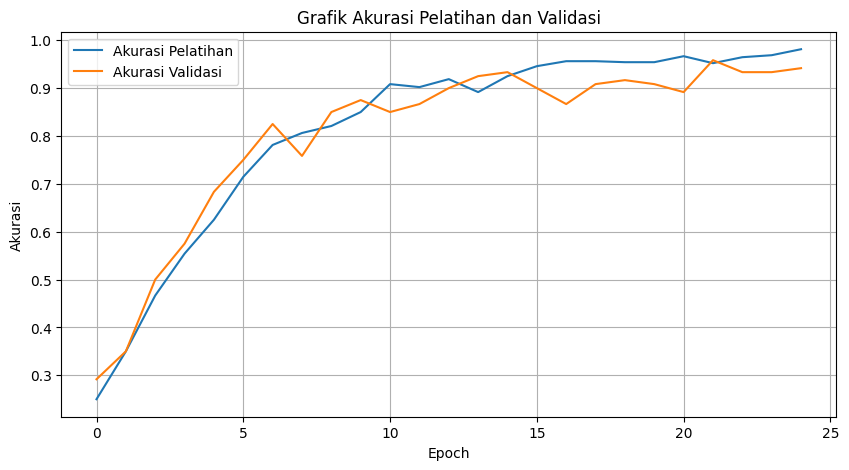

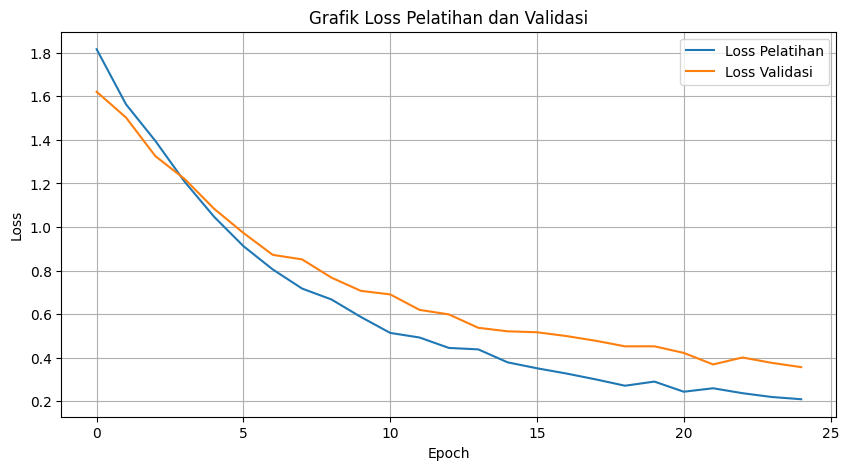

In [14]:
# Konfigurasi dasar
image_size = (225, 225)
batch_size = 16
num_classes = 6
epochs = 25
learning_rate = 0.0001

# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Model base
base_model = MobileNetV2(input_shape=image_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

# Tambahkan head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model_ckpt = ModelCheckpoint('Model_CNN_Baru_Final.keras', save_best_only=True)

# Training
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stop, model_ckpt]
)

# Plot Akurasi
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
#Akurasi Output 
loss, accuracy = model.evaluate(val_generator)
print(f"\nAkurasi: {accuracy*100:.2f}%")

NameError: name 'model' is not defined

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan data generator khusus untuk test, biasanya hanya rescale tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Buat test_generator dari folder test
test_generator = test_datagen.flow_from_directory(
    'dataset',      # Ganti dengan folder data test kamu
    target_size=(225, 225),
    batch_size=1,        # Biasanya batch size 1 untuk prediksi test per gambar
    class_mode='categorical',
    shuffle=False        # Penting agar urutan data tidak berubah, supaya label sinkron
)


Found 600 images belonging to 6 classes.


In [17]:
model.summary() 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 225, 225,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 113, 113,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 113, 113,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 113, 113,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 113, 113,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 113, 113,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 113, 113,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 113, 113,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 113, 113,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 113, 113,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 113, 113,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 113, 113,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 115, 115,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 57, 57,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 57, 57,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 57, 57,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 57, 57,    │      2,304 │ block_1_depthwis

 Total params: 2,281,044 (8.70 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 15,374 (60.06 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


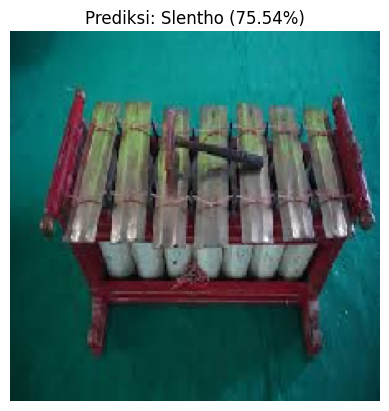

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tkinter import Tk, filedialog

# ======= 1. Muat model (.keras) =======
model = load_model('Model_CNN_Baru_Final.keras')

# ======= 2. Nama-nama kelas (urutkan sesuai training model) =======
class_names = ['Balungan', 'Bonang', 'Gambang', 'Kendang', 'Rebab', 'Slentho']

# ======= 3. Pilih file gambar =======
root = Tk()
root.withdraw()  # Sembunyikan jendela utama
file_path = filedialog.askopenfilename(
    title='Pilih Gambar Alat Musik Tradisional',
    filetypes=[("Image files", "*.jpg *.png *.jpeg")]
)

# ======= 4. Lakukan prediksi =======
if not file_path:
    print("❌ Tidak ada file dipilih.")
else:
    # Load dan praproses gambar
    img = image.load_img(file_path, target_size=(225, 225))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_label = class_names[predicted_index]
    confidence = np.max(prediction) * 100

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label} ({confidence:.2f}%)")
    plt.show()


In [19]:
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {prediction[0][i]*100:.2f}%")

Balungan: 15.70%
Bonang: 0.55%
Gambang: 3.94%
Kendang: 1.03%
Rebab: 3.24%
Slentho: 75.54%


In [20]:
# Prediksi seluruh data validasi
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


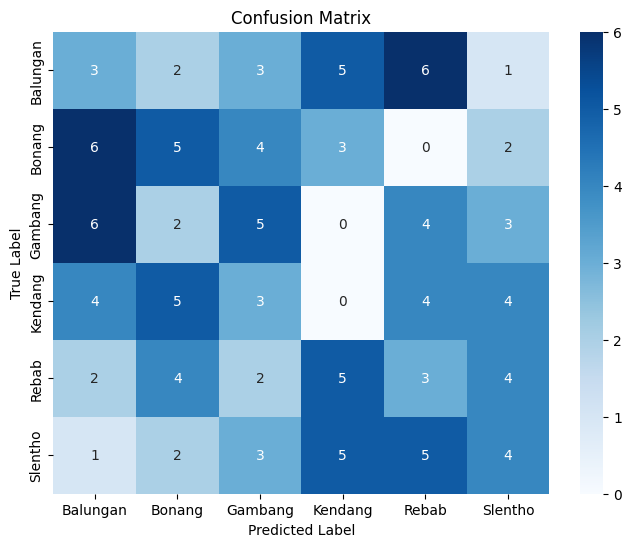

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [22]:
# Impor library yang dibutuhkan
from sklearn.metrics import f1_score, classification_report

# Prediksi seluruh data test
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Label sebenarnya
y_true = test_generator.classes

# Hitung F1 Score
f1 = f1_score(y_true, y_pred_classes, average='macro')
print(f"Macro-Averaged F1 Score: {f1:.4f}")

# (Opsional) Classification report lengkap
class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


  2/600 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step  

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step
Macro-Averaged F1 Score: 0.9900

Classification Report:
              precision    recall  f1-score   support

    Balungan       1.00      0.98      0.99       100
      Bonang       1.00      1.00      1.00       100
     Gambang       1.00      1.00      1.00       100
     Kendang       1.00      0.96      0.98       100
       Rebab       0.96      1.00      0.98       100
     Slentho       0.98      1.00      0.99       100

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [23]:
# Impor library yang dibutuhkan
from sklearn.metrics import f1_score, classification_report

# Prediksi seluruh data test
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Label sebenarnya
y_true = test_generator.classes

# Hitung berbagai jenis F1 Score
f1_macro = f1_score(y_true, y_pred_classes, average='macro')
f1_micro = f1_score(y_true, y_pred_classes, average='micro')
f1_weighted = f1_score(y_true, y_pred_classes, average='weighted')

# Tampilkan hasilnya
print(f"Macro-Averaged F1 Score   : {f1_macro:.4f}")
print(f"Micro-Averaged F1 Score   : {f1_micro:.4f}")
print(f"Weighted-Averaged F1 Score: {f1_weighted:.4f}")


600/600 ━━━━━━━━━━━━━━━━━━━━ 50s 83ms/step
Macro-Averaged F1 Score   : 0.9900
Micro-Averaged F1 Score   : 0.9900
Weighted-Averaged F1 Score: 0.9900


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

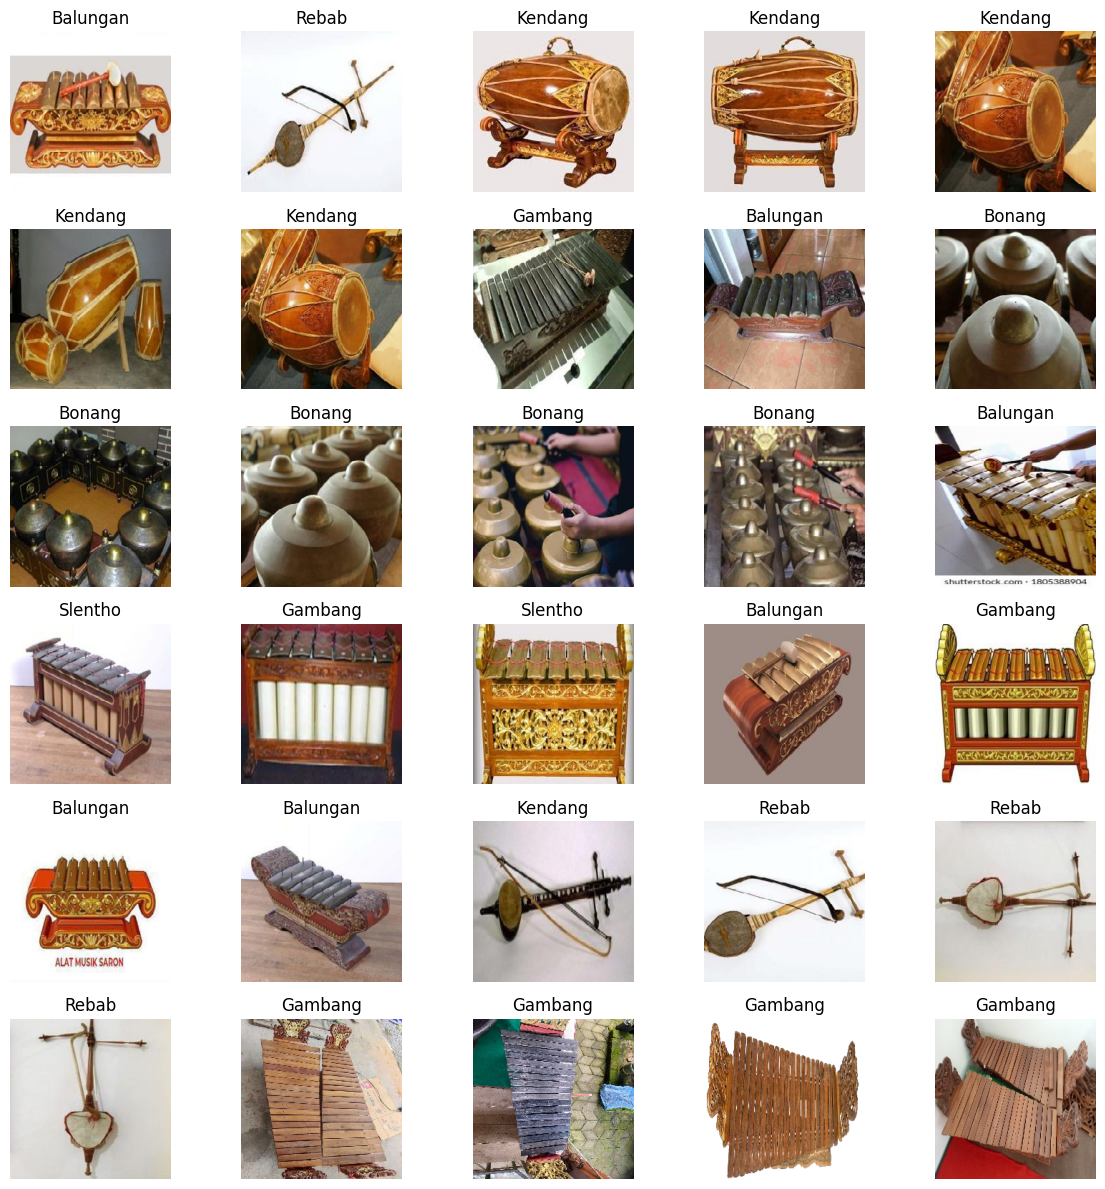

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load model (.keras)
model = load_model('Model_CNN_Baru_Final.keras')

# Class names
class_names = ['Balungan', 'Bonang', 'Gambang', 'Kendang', 'Rebab', 'Slentho']

# Ukuran gambar
image_size = (225, 225)
testing_dir = 'testing'

# Ambil file gambar
image_files = [f for f in os.listdir(testing_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Tampilkan hasil prediksi
plt.figure(figsize=(12, 12))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(testing_dir, image_file)
    
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_label = class_names[np.argmax(prediction)]

    # Plot
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.title(predicted_label)
    plt.axis('off')

plt.tight_layout()
plt.show()